In [65]:
from sklearn import datasets
from sklearn.decomposition import PCA

#### Dataset loading

In [66]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

#### Dataset sample visualization

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_3d_graph(X):
    ax = plt.figure(figsize=(16, 12)).add_subplot(projection='3d')
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], zdir='y', label='Iris samples')
    ax.legend()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(-10, 10)
    ax.set_xlabel(iris['feature_names'][0])
    ax.set_ylabel(iris['feature_names'][1])
    ax.set_zlabel(iris['feature_names'][2])
    plt.show()

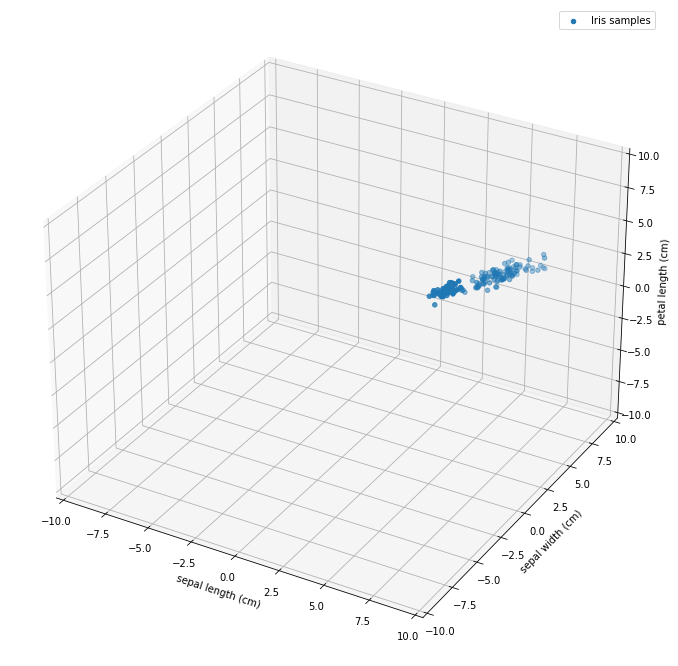

In [68]:
plot_3d_graph(X)

In [69]:
import numpy as np
import random

number_of_examples = 10
Xy = np.concatenate((X[:number_of_examples, :], np.expand_dims([yex for yex in y[:number_of_examples]], axis=1)), axis=1)
iris_df = pd.DataFrame(Xy[:number_of_examples, :])
iris_df.columns = iris['feature_names'] + ["type"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


#### Data preprocessing

In [70]:
from sys import float_info

Xy_n = (Xy[:, :4] - np.min(Xy[:, :4])) / (np.max(Xy[:, :4]) - np.min(Xy[:, :4]))
Xy_s = (Xy_n[:, :4] - np.mean(Xy_n[:, :4])) / (Xy_n[:, :4] + float_info.epsilon)
number_of_examples = 15
iris_df = pd.DataFrame(Xy_n[:number_of_examples, :])
iris_df.columns = iris['feature_names']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.943396,0.641509,0.245283,0.018868
1,0.905660,0.547170,0.245283,0.018868
2,0.867925,0.584906,0.226415,0.018868
3,0.849057,0.566038,0.264151,0.018868
4,0.924528,0.660377,0.245283,0.018868
5,1.000000,0.716981,0.301887,0.056604
6,0.849057,0.622642,0.245283,0.037736
7,0.924528,0.622642,0.264151,0.018868
8,0.811321,0.528302,0.245283,0.018868
9,0.905660,0.566038,0.264151,0.000000


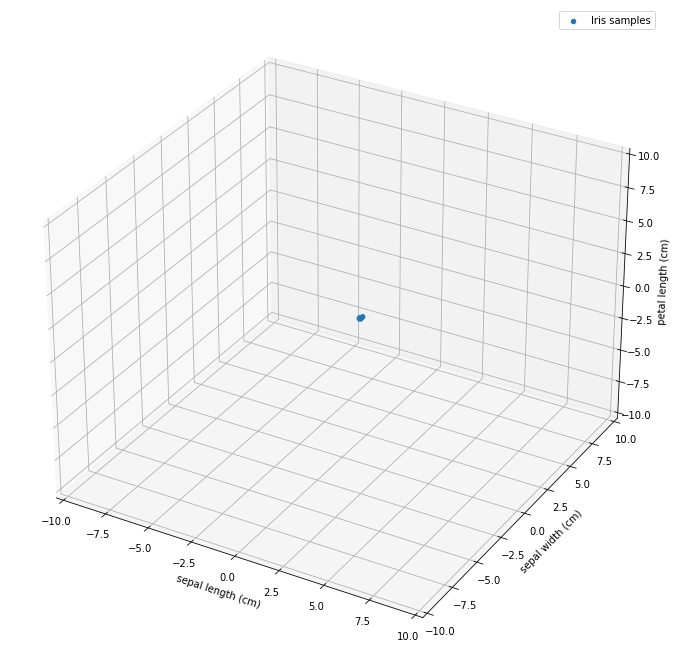

In [71]:
plot_3d_graph(Xy_n)